In [2]:
import tensorflow as tf
import sys
import pandas as pd # pandas : 데이터 처리, 가공 및 분석을 편리하게 함
import numpy as np # numpy : 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리
import matplotlib.pyplot as plt # matplotlib의 pyplot을 plt라는 이름으로 import
# matplotlib : 자료를 시각화하는데 사용하는 대표적인 라이브러리
import matplotlib.image as mpimg # matplotlib의 image를 mpimg라는 이름으로 import
import seaborn as sns # seaborn : matplotlib 기반의 파이썬 데이터 시각화 라이브러리

%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

#실행 시마다 같은 결과값 도출을 위한 시드 설정
np.random.seed(2) # seed 설정 # seed : 특정 시작 숫자
tf.random.set_seed(2)

# 훈련데이터 세트 분할
from sklearn.model_selection import train_test_split
# sklearn.model_selection 모듈에서train_test_split() 함수를 import
from sklearn.metrics import confusion_matrix # 혼동행렬을 위한 기능 불러옴
import itertools # 자신만의 반복자를 만드는 모듈

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
# one-hot encoding : 1차원 배열에 각각의 숫자일 확률을 기록 & 그 확률이 가장 높은 것을 정답으로 취급
from keras.models import Sequential # Sequential 모델 : 레이어를 선형으로 연결하여 구성
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop # RMSprop : 딥러닝 최적화 기법
from keras.preprocessing.image import ImageDataGenerator
# 실시간 데이터 증강을 사용해서 텐서 이미지 데이터 배치를 생성
from keras.callbacks import ReduceLROnPlateau # 콜백함수
# 학습률이 개선되지 않을 때, 학습률을 동적으로 조정하여 학습률을 개선하는 효과


sns.set(style='white', context='notebook', palette='deep')

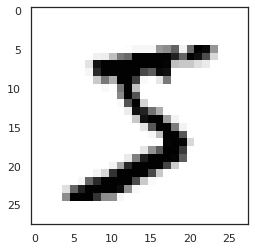

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


In [25]:
from __future__ import print_function
# __future__ : 파이썬2.x 에서 몇몇 기능들을 파이썬3.x 와 같이 사용 가능하게 만들어줌
import keras
from keras.datasets import mnist # mnist 데이터셋 호출
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# 데이터를 불러와서 각 변수에 저장
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train : 2828의 행렬을 2828 픽셀로 생각했을때, 숫자가 작을수록 해당 픽셀의 색이
#진한 검정색을 의미. (0에 가까울수록 검은색, 255에 가까울수록 하얀색)
#y_train : 정답(숫자)

# 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(x_train[0], cmap='Greys')
plt.show()

# 0번째 원소의 모든 데이터를 출력
for x in x_train[0]:
  for i in x:
    sys.stdout.write('%d ' % i)
  sys.stdout.write('\n')

if K.image_data_format() == 'channels_first':
  # image_data_format이 ‘channels_first’인 경우 (샘플 수, 채널 수, 행, 열)로 이루어진 4D 텐서
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 학습에 적합한 형태로 데이터 가공
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
# ((60000, 28, 28), (60000, ))
print(x_train.shape[0], 'train samples') # 학습셋 이미지 수
print(x_test.shape[0], 'test samples') # 테스트셋 이미지 수

# 클래스를 학습에 이용하기 위해 데이터 가공
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# 딥러닝 모델 구조 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

# (2개층, 128개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값, relu와 softmax 활성화 함수 이용)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 딥러닝 구조 설정(loss 옵션을 다중 클래스에 적합한 categorical_crossentropy, 옵티마이저는 Adam 설정)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=2)

# 학습 loss값, 정확도 출력
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 모델 저장
model.save('digit_model.h5')

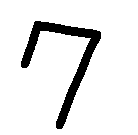

1/1 [==============================] - 0s 64ms/step
3


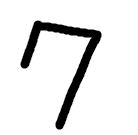

-1

In [27]:
from PIL import Image # PIL : 이미지 파일 처리
from keras.models import load_model
from keras.models import Sequential
from google.colab.patches import cv2_imshow
import cv2

# test.png : 그림판에서 붓으로 숫자를 그림 이미지 파일
# 이미지파일 -> 그레이스케일
img_color = cv2.imread('test7.png', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
# 그레이 스케일 > 바이너리 
ret,img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 모폴로지 연산을 적용하여 이진화 결과 생겼을지 모를 빈 공백을 메꿈
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
img_binary = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, kernel)

#cv2_imshow(img_binary)
#cv2.waitKey(0)

# 숫자별로 분리하기 위해 컨투어를 검출
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)

# 숫자별로 경계박스를 구함
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)

# 가로, 세로중 긴 방향을 택한 후, 여분을 추가하여 한변의 크기를 정함
# 잘라낸 숫자 이미지를 저장할 빈 이미지를 생성
  length = max(w, h) + 60
  img_digit = np.zeros((length, length, 1), np.uint8)

# 숫자가 이미지의 정중앙에 오도록 경계박스의 시작 위치를 조정
  new_x, new_y = x - (length - w)//2, y-(length - h)//2

# 바이너리 이미지에서 숫자 영역을 가져와 img_digit에 저장
  img_digit = img_binary[new_y:new_y+length, new_x:new_x+length]

# 숫자가 잘 인식되도록 팽창 모폴로지 연산을 적용
  kernel = np.ones((5, 5), np.uint8)
  img_digit = cv2.morphologyEx(img_digit, cv2.MORPH_DILATE, kernel)

  cv2_imshow(img_binary)
  cv2.waitKey(0)

# 모델 불러오기
  model = load_model('digit_model.h5')

# 이미지 크기를 학습된 모델에서 요구되는 28*28 변환
  img_digit = cv2.resize(img_digit, (28, 28), interpolation=cv2.INTER_AREA)

# 학습시 했던 것처럼 이미지 픽셀 범위 0~1 사이로 변환 
  img_digit = img_digit / 255.0

# 학습된 모델에서 요구하는 형태로 이미지 형태 변환
  img_input = img_digit.reshape(1, 28, 28, -1)

# 이미지를 입력으로 사용하여 예측 진행
  predictions = model.predict(img_input)

#인식된 숫자 
  number = np.argmax(predictions)
  print(number)

cv2_imshow(img_color)
cv2.waitKey(0)